In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The Location1.csv, Location2.csv, Location3.csv, and Location4.csv files in this dataset each represent wind power generation data from different geographic locations. While the data structure (columns and information types) will likely be similar across these files, the data values ​​will vary, reflecting the unique weather patterns, wind speeds, and power generation characteristics of each location.

# **Location1**

In [ ]:
df_location1 = pd.read_csv("Location1.csv")
df_location1.head(3)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214


In [ ]:
df_location1.shape

(43800, 10)

In [ ]:
df_location1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB




*  numeric = [temperature_2m,relativehumidity_2m,dewpoint_2m, windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power]
*   category = [Time]


          



In [ ]:
numeric = ["temperature_2m","relativehumidity_2m","dewpoint_2m",
           "windspeed_10m","windspeed_100m","winddirection_10m","winddirection_100m","windgusts_10m","Power"]
category = ["Time"]



The columns in the data are as follows:

*    Time - Hour of the day when readings occurred
*    temperature_2m - Temperature in degrees Fahrenheit at 2 meters above the surface
* relativehumidity_2m - Relative humidity (as a percentage) at 2 meters above the surface
* dewpoint_2m - Dew point in degrees Fahrenheit at 2 meters above the surface
* windspeed_10m - Wind speed in meters per second at 10 meters above the surface
* windspeed_100m - Wind speed in meters per second at 100 meters above the surface
* winddirection_10m - Wind direction in degrees (0-360) at 10 meters above the surface
* winddirection_100m - Wind direction in degrees (0-360) at 100 meters above the surface
* windgusts_10m - Wind gusts in meters per second at 100 meters above the surface
* Power - Turbine output, normalized to be between 0 and 1 (i.e., a percentage of maximum potential output)



In [ ]:
df_location1[numeric].describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,33953.000000,33953.000000,33953.000000,33953.000000,33953.000000,33953.000000,33953.000000,33953.000000,33953.000000
mean,47.905575,72.163461,38.576194,3.607112,6.306454,201.534828,201.144376,7.820266,0.401846
std,19.544978,16.843530,18.937945,1.659657,2.694604,97.204617,98.704298,3.600122,0.284602
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.300000,60.000000,24.100000,2.410000,4.400000,126.000000,125.000000,5.000000,0.149300
50%,47.700000,74.000000,38.600000,3.310000,6.090000,223.000000,224.000000,7.300000,0.345500
75%,64.400000,86.000000,54.700000,4.600000,8.010000,276.000000,277.000000,10.100000,0.651000
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,28.500000,0.985700


In [ ]:
df_location1['Time'] = df_location1['Time'].astype('datetime64[ns]')
df_location1['hour'] = df_location1['Time'].dt.hour
df_location1['day'] = df_location1['Time'].dt.dayofweek
df_location1['month'] = df_location1['Time'].dt.month
df_location1['year'] = df_location1['Time'].dt.year

In [ ]:
df_location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,hour,day,month,year
0,2017-01-02 00:00:00,28.5,85.0,24.5,1.44,1.26,146.0,162.0,1.4,0.1635,0,0,1,2017
1,2017-01-02 01:00:00,28.4,86.0,24.7,2.06,3.99,151.0,158.0,4.4,0.1424,1,0,1,2017
2,2017-01-02 02:00:00,26.8,91.0,24.5,1.30,2.78,148.0,150.0,3.2,0.1214,2,0,1,2017
3,2017-01-02 03:00:00,27.4,88.0,24.3,1.30,2.69,58.0,105.0,1.6,0.1003,3,0,1,2017
4,2017-01-02 04:00:00,27.3,88.0,24.1,2.47,4.43,58.0,84.0,4.0,0.0793,4,0,1,2017


# **Target - > Power**

In [ ]:
min_date = df_location1['Time'].min()
max_date = df_location1['Time'].max()

# Print the range
print(f"Data ranges from {min_date.year}-{min_date.month}-{min_date.day} to {max_date.year}-{max_date.month}-{max_date.day}")


Data ranges from 2017-1-2 to 2020-11-16


In [ ]:
coulmn = {
    'year' :  df_location1['year'],
    'power' : df_location1['Power'],
}

year = pd.DataFrame(coulmn)
year = year.groupby(["year"],as_index=False)[["power"]].mean()
year = year.sort_values('power',ascending=False)
year.head(5)

,year,power
1,2018,0.407273
0,2017,0.405975
2,2019,0.401908
3,2020,0.390911


<ipython-input-11-b60dbd519d1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='power', data=year, ax=ax, palette="ch:s=.25,rot=-.25")


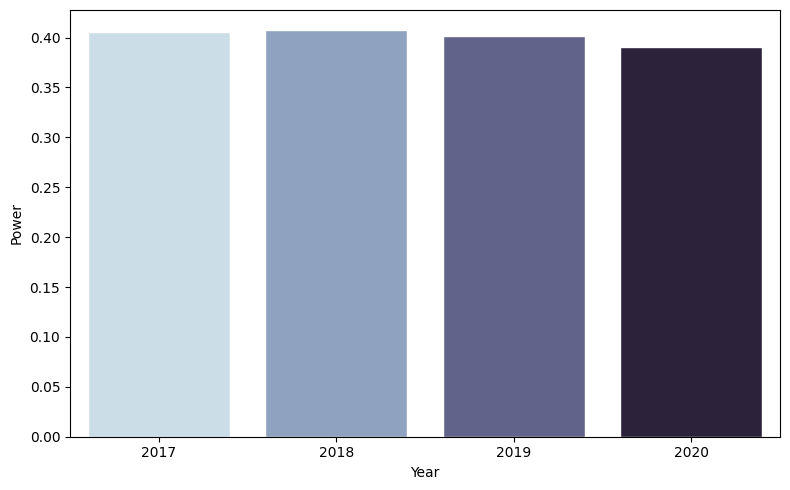

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x='year', y='power', data=year, ax=ax, palette="ch:s=.25,rot=-.25")
ax.set_ylabel("Power")
ax.set_xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
coulmn = {
    'month' :  df_location1['month'],
    'power' : df_location1['Power'],
}

month = pd.DataFrame(coulmn)
month = month.groupby(["month"],as_index=False)[["power"]].mean()
month = month.sort_values('power',ascending=False)
month.head(5)

,month,power
1,2,0.504844
10,11,0.482678
0,1,0.482158
9,10,0.474387
2,3,0.470367


<ipython-input-13-09d6177171a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='power', data=month, ax=ax, palette="ch:s=.25,rot=-.25")


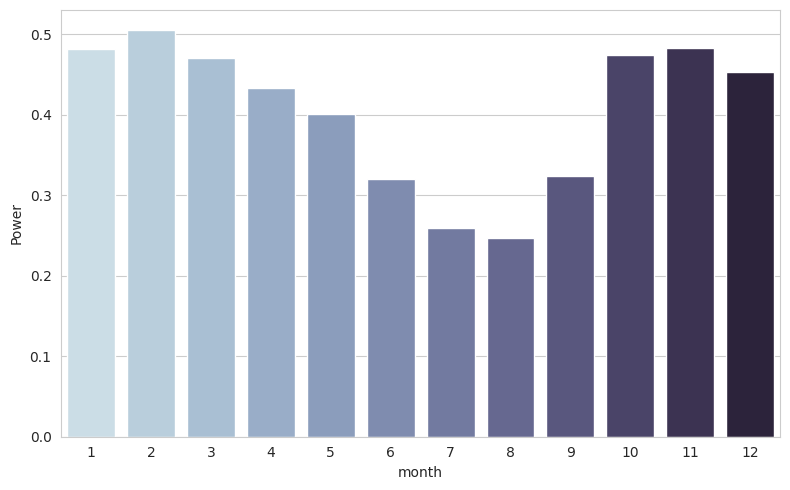

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x='month', y='power', data=month, ax=ax, palette="ch:s=.25,rot=-.25")
ax.set_ylabel("Power")
ax.set_xlabel("month")
plt.tight_layout()
plt.show()

In [ ]:
coulmn = {
    'day' :  df_location1['day'],
    'power' : df_location1['Power'],
}

day = pd.DataFrame(coulmn)
day = day.groupby(["day"],as_index=False)[["power"]].mean()
day = day.sort_values('power',ascending=False)
day.head(5)

,day,power
2,2,0.418613
1,1,0.410944
3,3,0.408927
4,4,0.397403
0,0,0.396842


<ipython-input-15-ae344b51995c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='power', data=day, ax=ax, palette="ch:s=.25,rot=-.25")


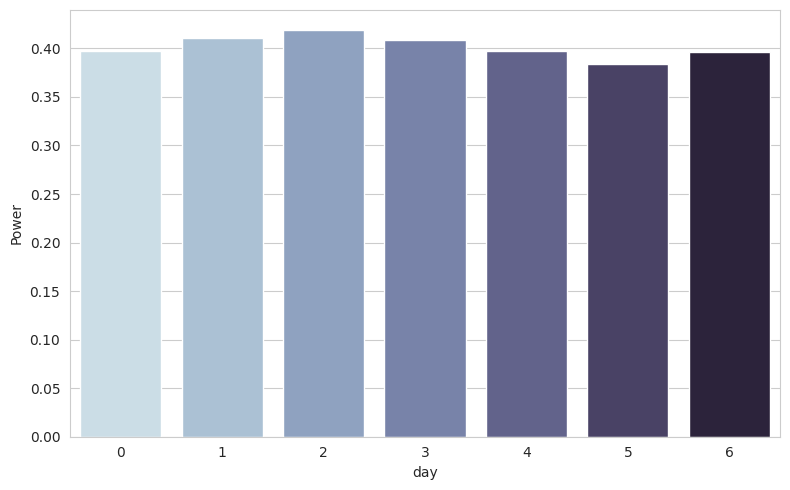

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x='day', y='power', data=day, ax=ax, palette="ch:s=.25,rot=-.25")
ax.set_ylabel("Power")
ax.set_xlabel("day")
plt.tight_layout()
plt.show()

In [ ]:
coulmn = {
    'hour' :  df_location1['hour'],
    'power' : df_location1['Power'],
}

hour = pd.DataFrame(coulmn)
hour = hour.groupby(["hour"],as_index=False)[["power"]].mean()
hour = hour.sort_values('power',ascending=False)
hour.head(5)

,hour,power
4,4,0.432457
5,5,0.431796
3,3,0.427142
6,6,0.425162
2,2,0.421826


<ipython-input-17-bd00e95600e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='power', data=hour, ax=ax, palette="ch:s=.25,rot=-.25")


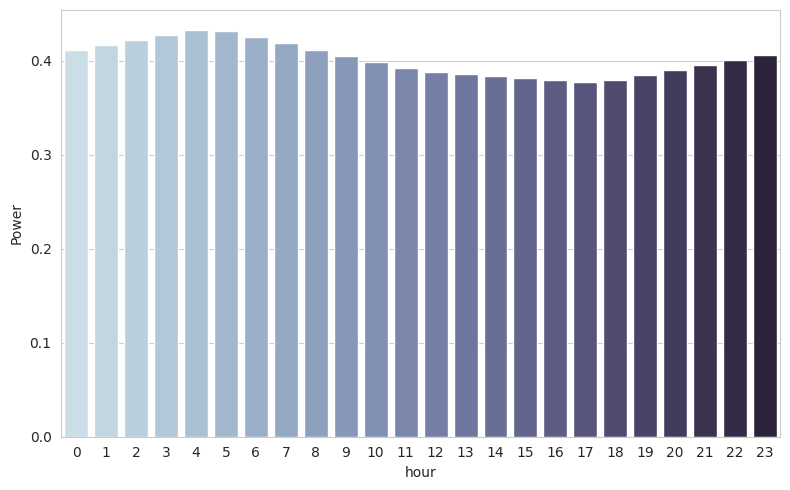

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.set_style('whitegrid')
sns.barplot(x='hour', y='power', data=hour, ax=ax, palette="ch:s=.25,rot=-.25")
ax.set_ylabel("Power")
ax.set_xlabel("hour")
plt.tight_layout()
plt.show()

In [ ]:
start_date = '2018-01-02 00:00:00'
end_date = '2018-01-03 00:00:00	'
mask = (df_location1['Time'] >= start_date) & (df_location1['Time'] < end_date)
Day = df_location1.loc[mask]

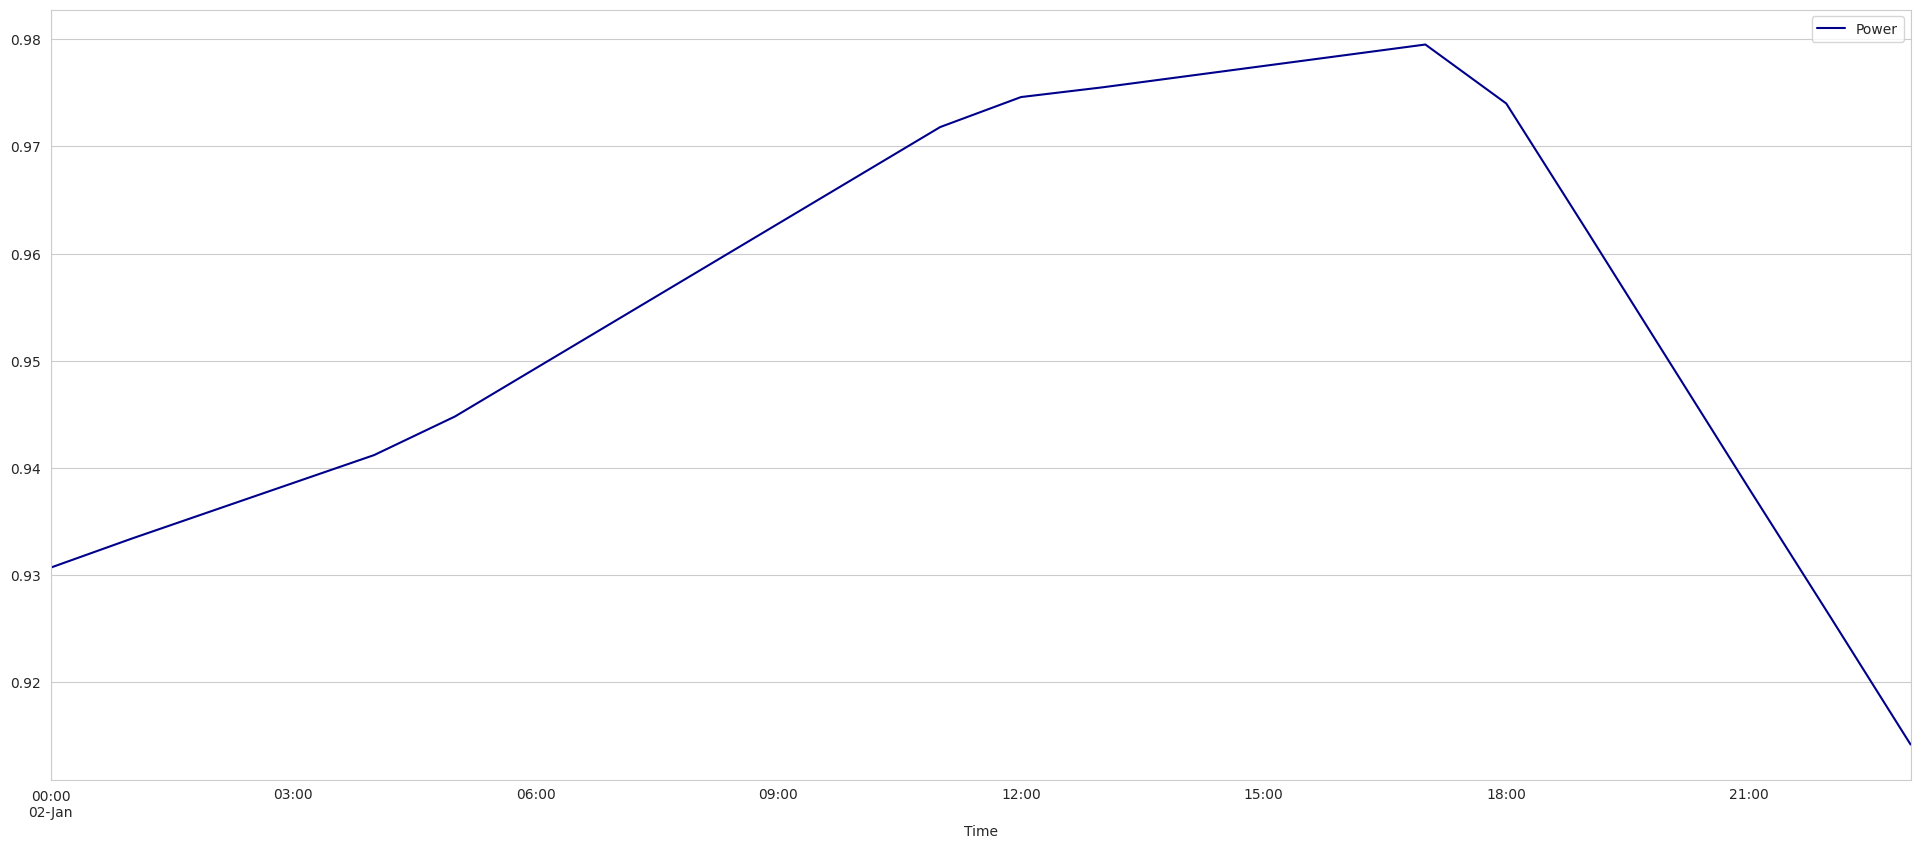

In [ ]:
day_plot = Day.plot(x='Time' , y= 'Power', c='DarkBlue', figsize=(24,10))

In [ ]:
import plotly.express as px

fig = px.area(df_location1, x='Time', y='Power', title="Interactive Time vs Power Scatter Plot")

fig.show()

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




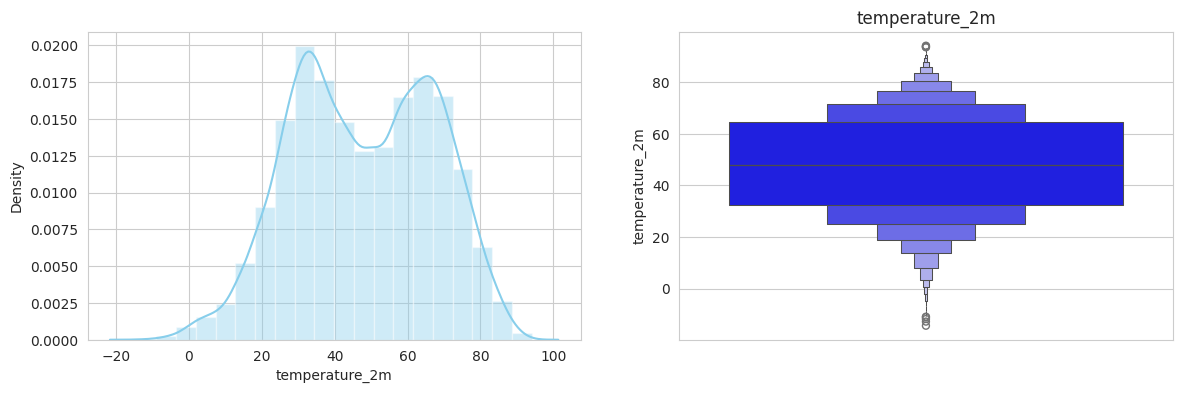

In [ ]:
def plots(feature):
    plt.figure(figsize=(14, 6)).set_figheight(4)
    plt.subplot(1,2,1)
    sns.distplot(df_location1[feature], bins=20,color ="skyblue")
    plt.subplot(1,2,2)
    sns.boxenplot(df_location1[feature],color ="blue")
    plt.title(feature)
    plt.show()
plots(numeric[0])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




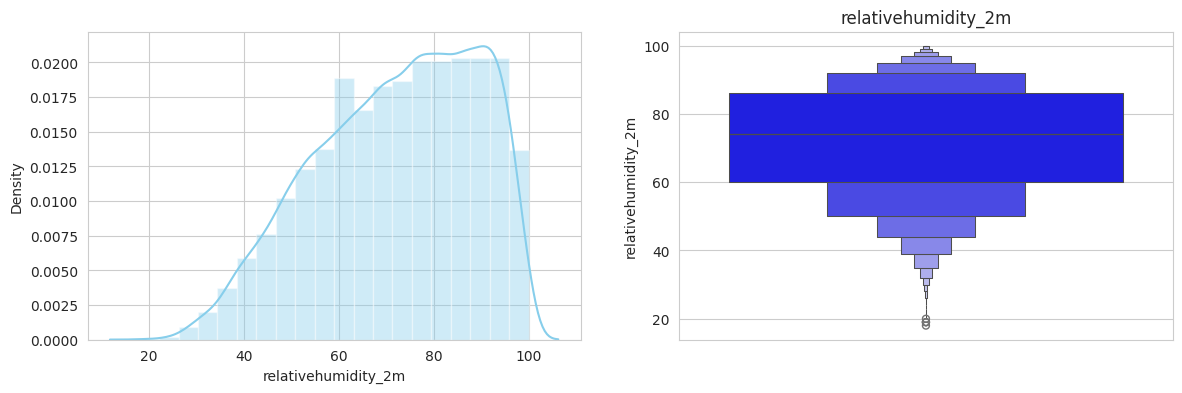

In [ ]:
plots(numeric[1])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




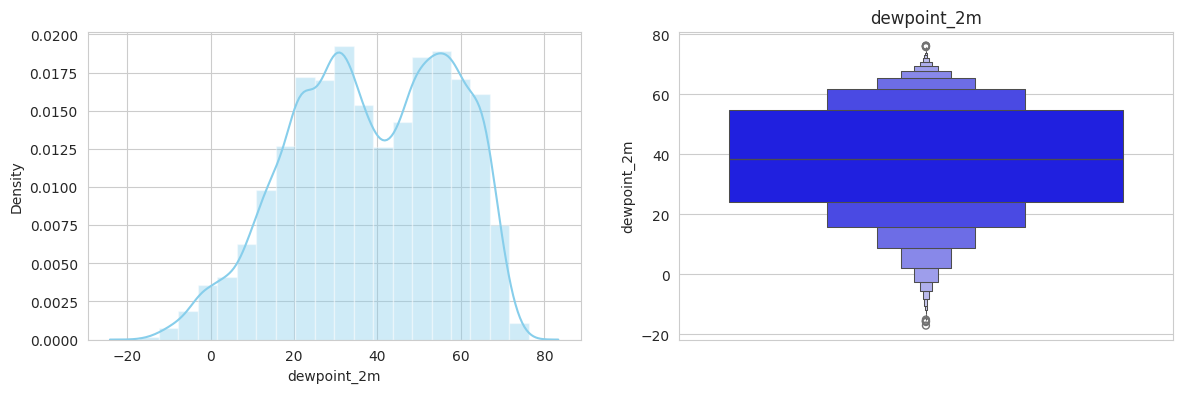

In [ ]:
plots(numeric[2])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




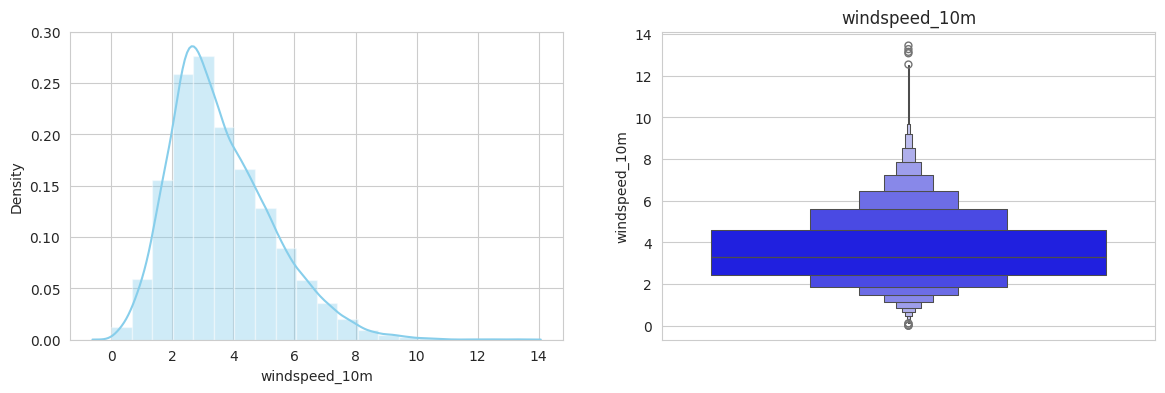

In [ ]:
plots(numeric[3])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




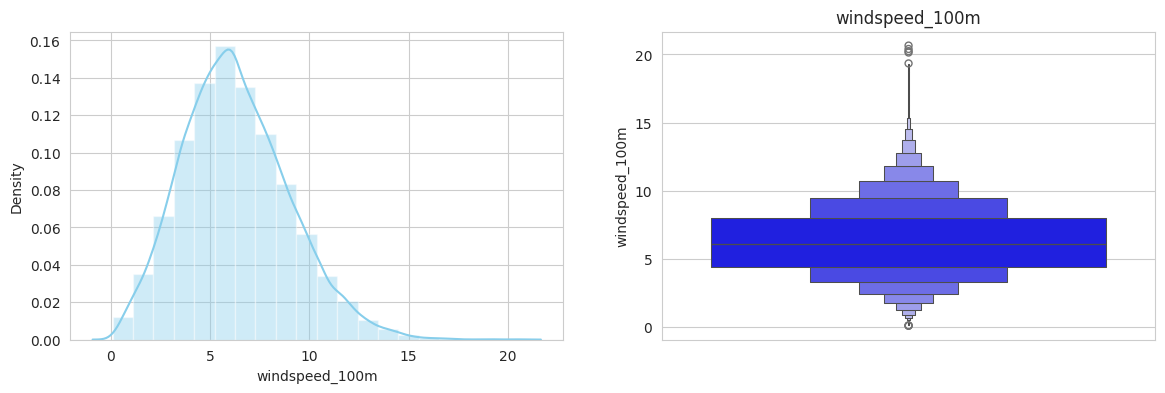

In [ ]:
plots(numeric[4])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




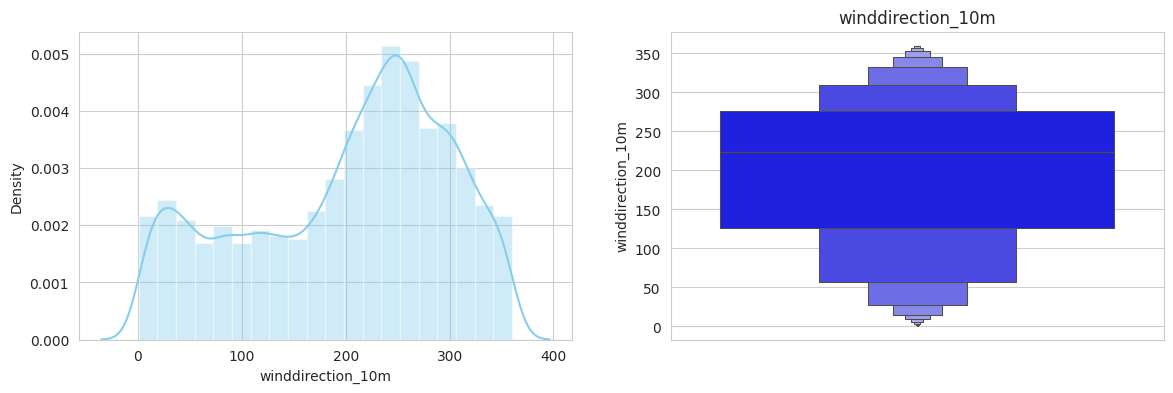

In [ ]:
plots(numeric[5])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




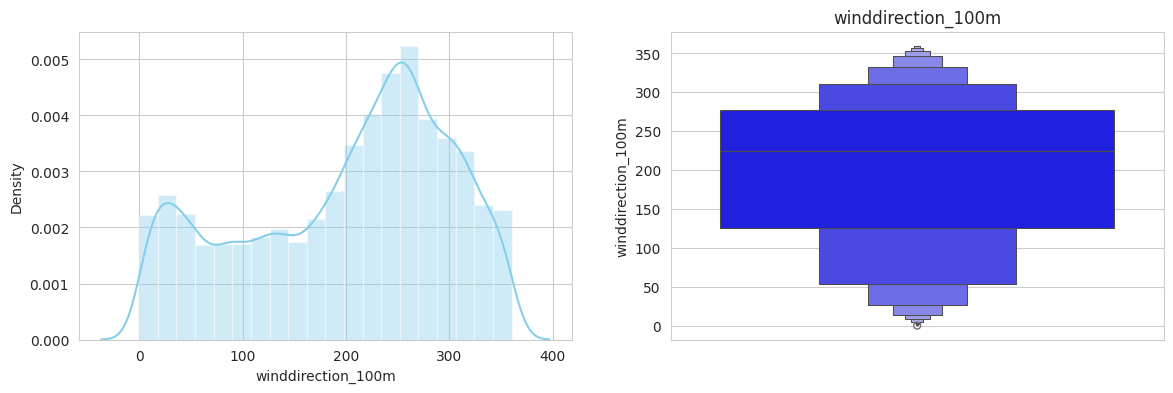

In [ ]:
plots(numeric[6])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




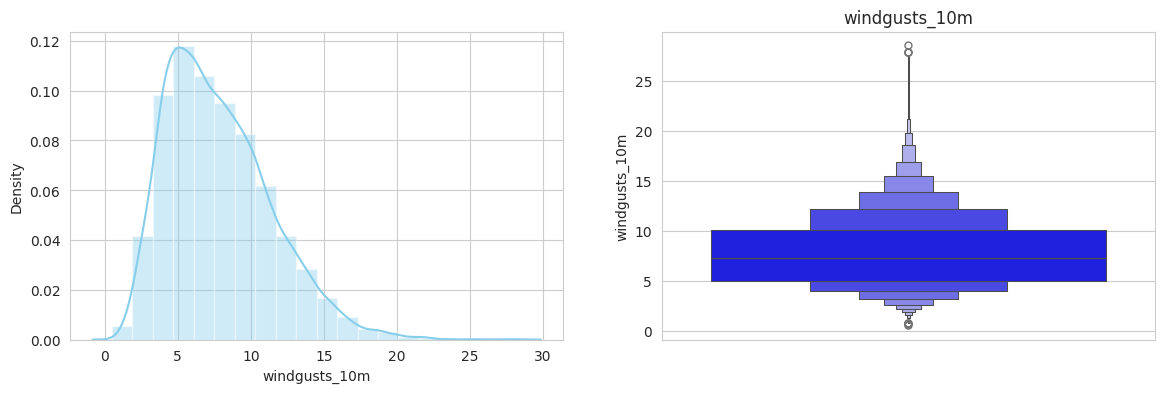

In [ ]:
plots(numeric[7])

<ipython-input-21-77c5d5847649>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




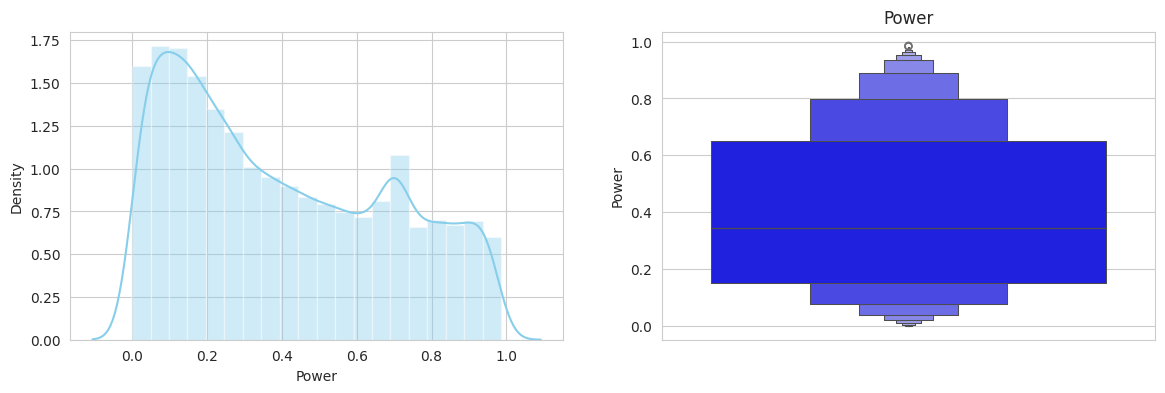

In [ ]:
plots(numeric[8])

<Axes: >

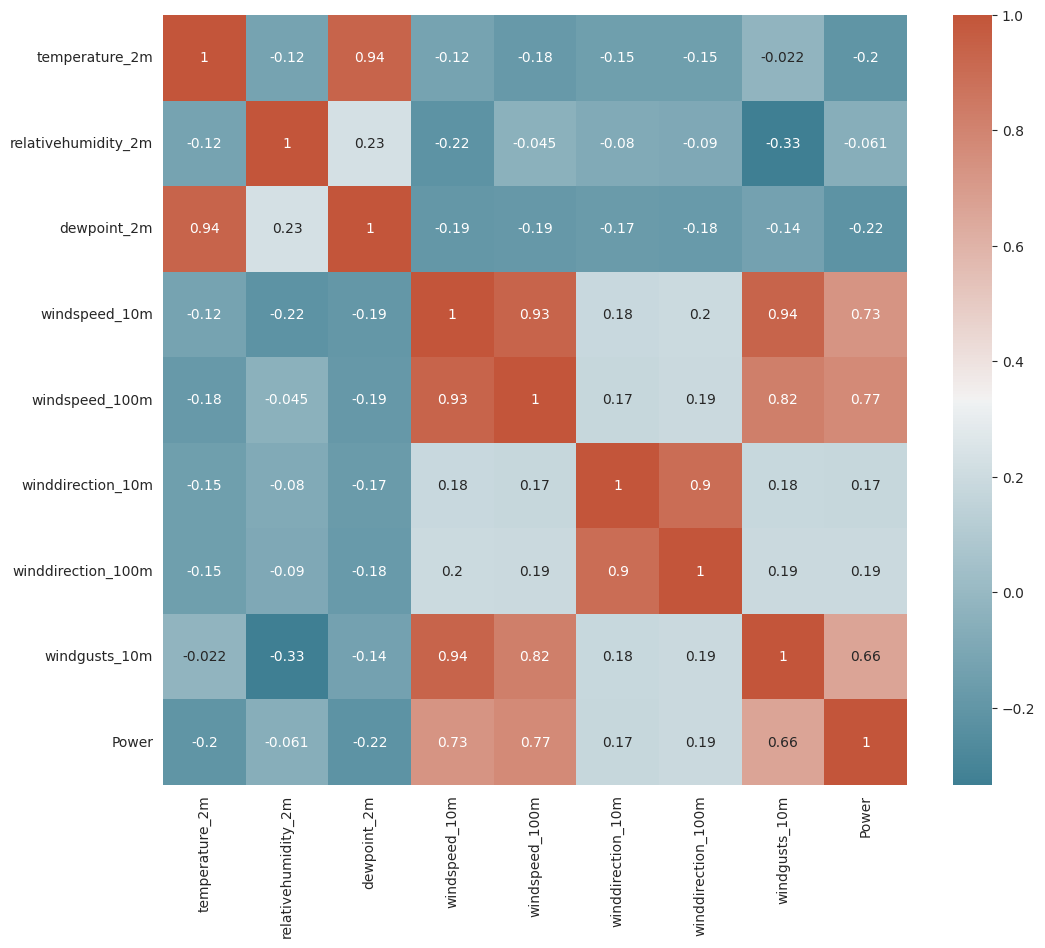

In [ ]:
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df_location1[numeric].corr(), cmap=cmap, annot=True)

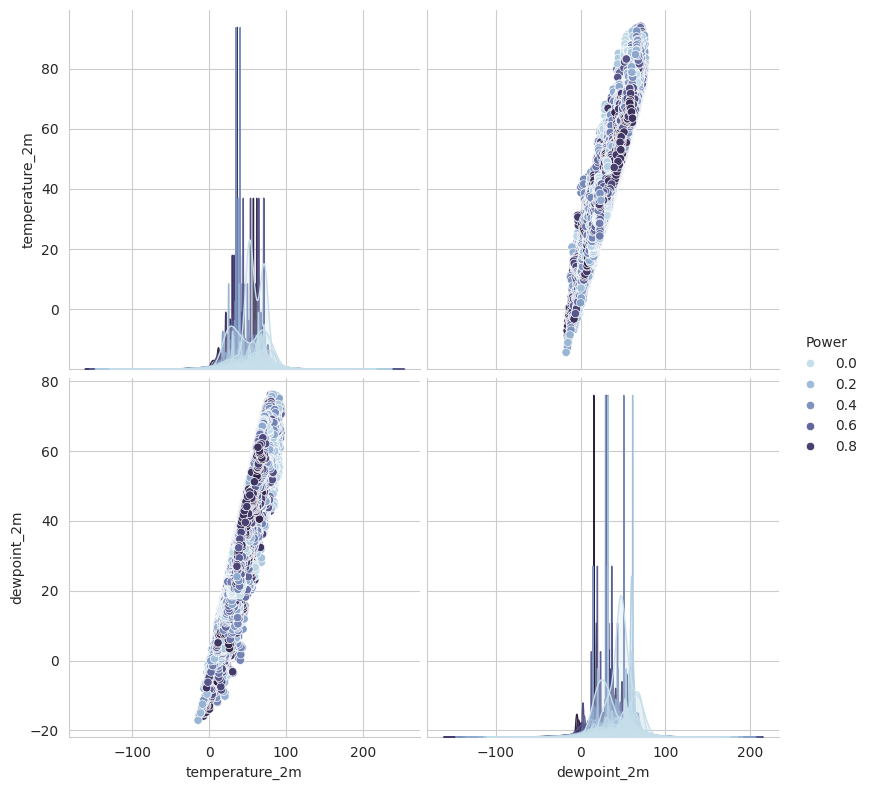

In [ ]:
sns.pairplot(df_location1, hue='Power', vars=[numeric[0],numeric[2]], palette='ch:s=.25,rot=-.25', height=4,width=4)

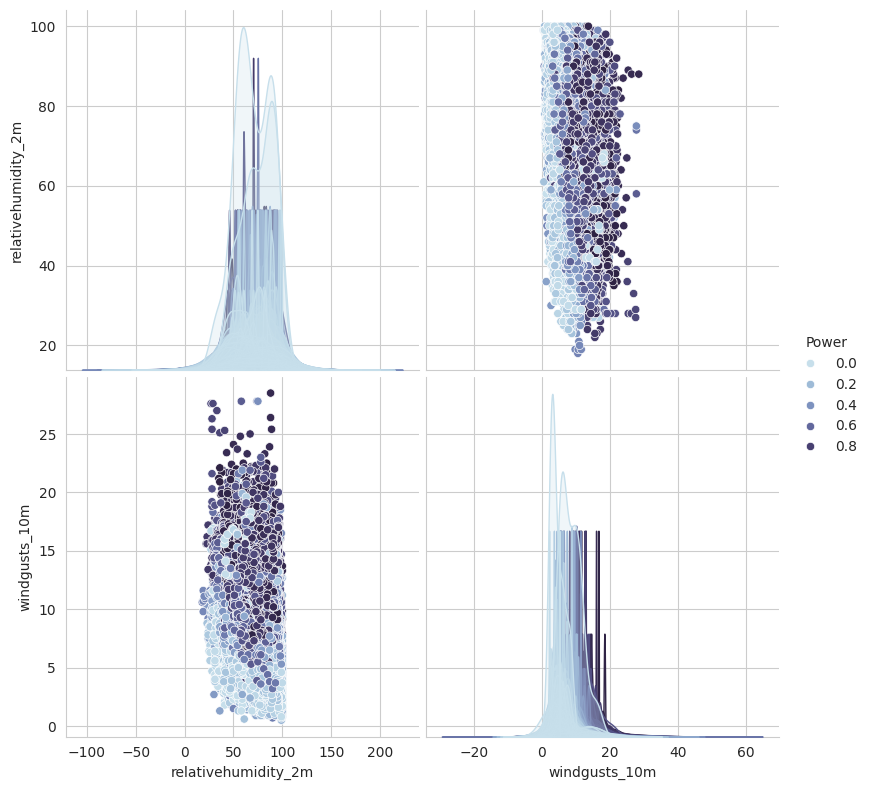

In [ ]:
sns.pairplot(df_location1, hue='Power', vars=[numeric[1],numeric[7]], palette='ch:s=.25,rot=-.25', height=4)

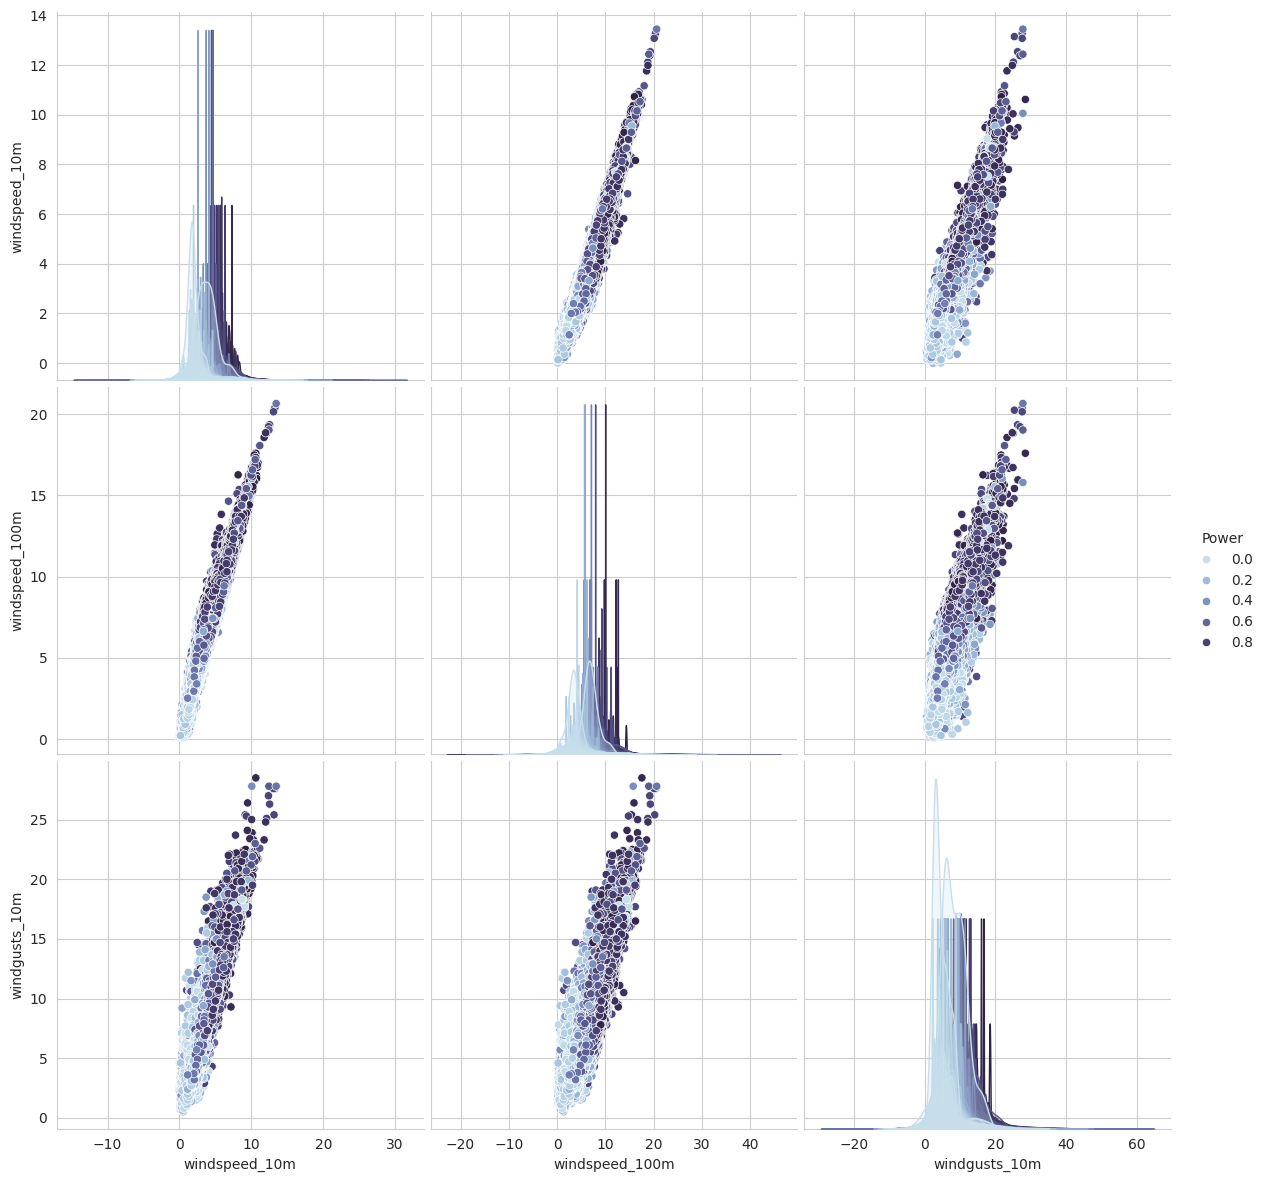

In [ ]:
sns.pairplot(df_location1, hue='Power', vars=[numeric[3],numeric[4],numeric[7]], palette='ch:s=.25,rot=-.25', height=4)

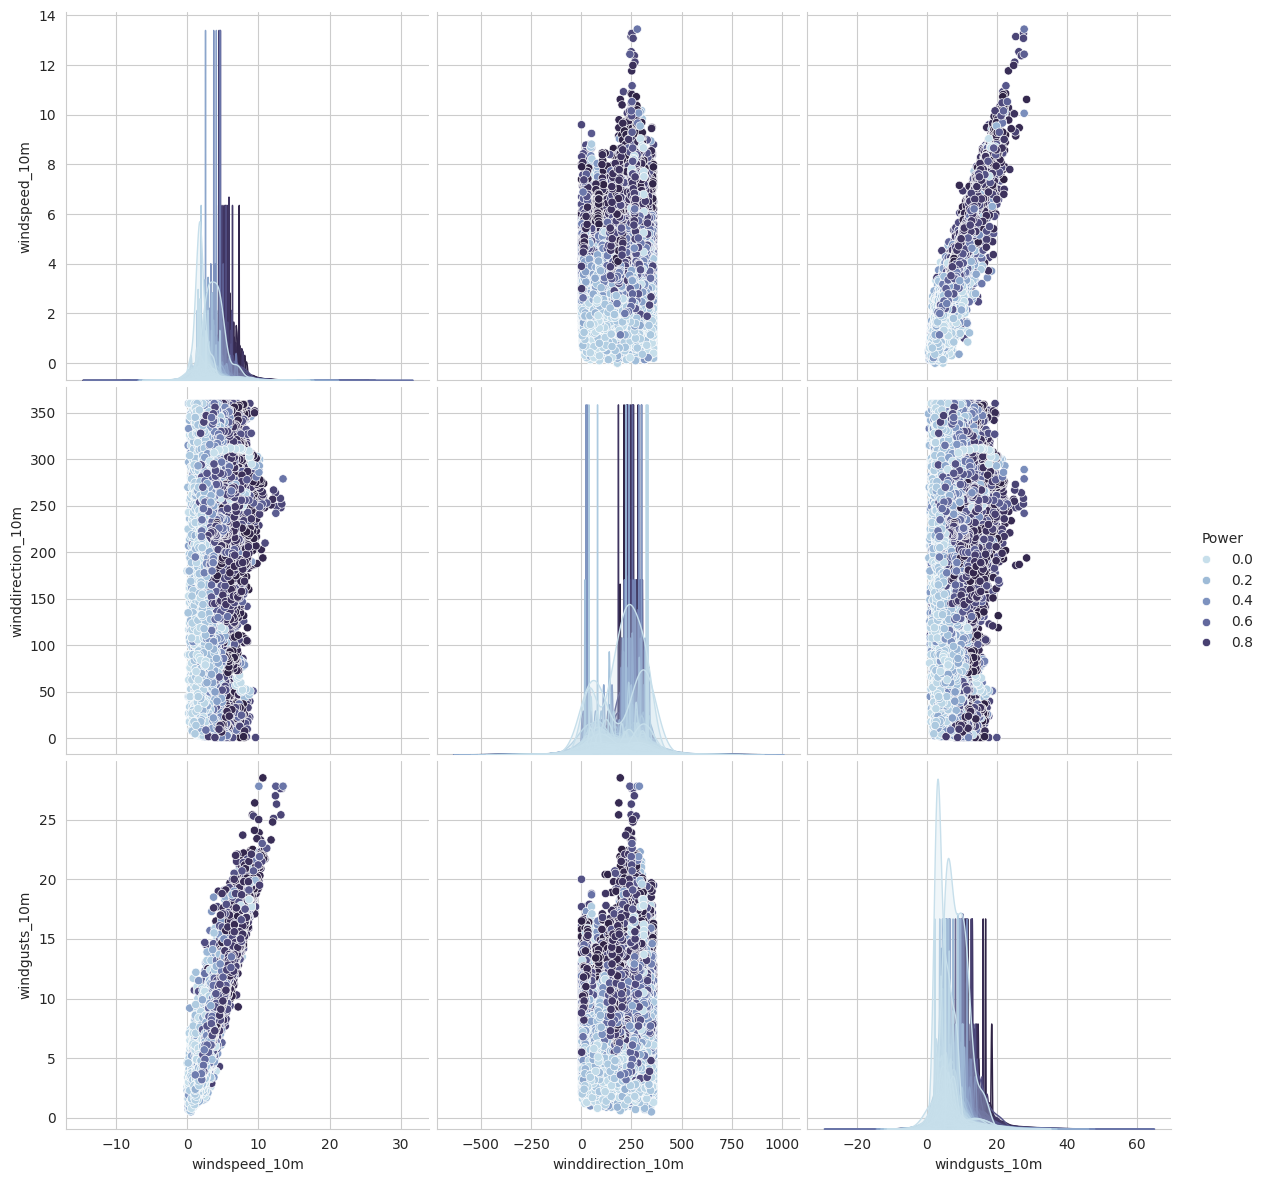

In [ ]:
sns.pairplot(df_location1, hue='Power', vars=[numeric[3],numeric[5],numeric[7]], palette='ch:s=.25,rot=-.25', height=4)

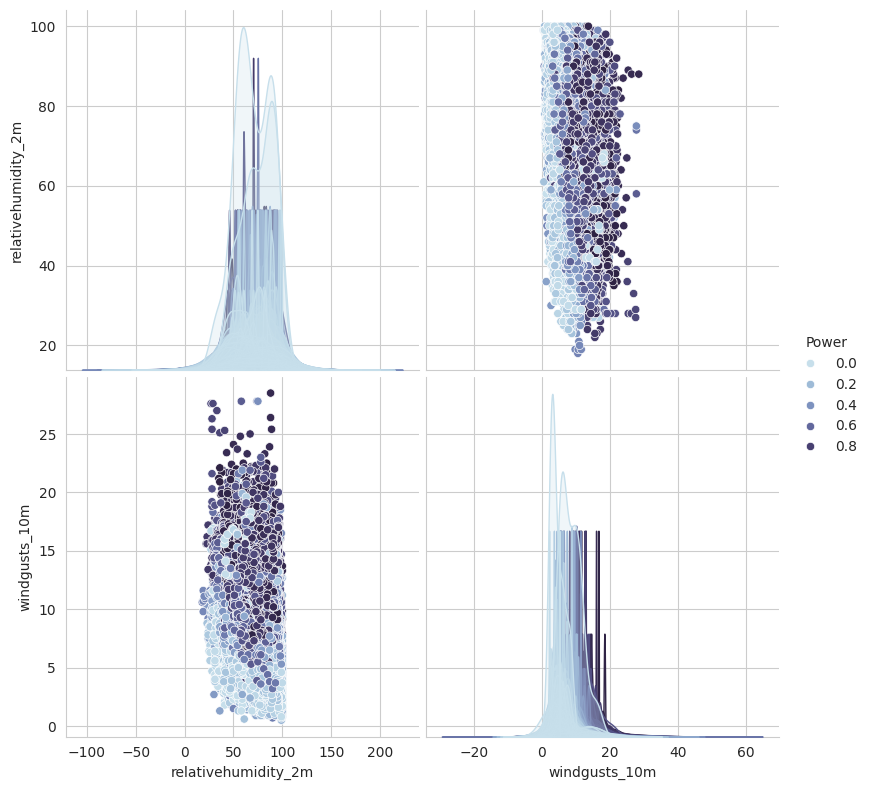

In [ ]:
sns.pairplot(df_location1, hue='Power', vars=[numeric[1],numeric[7]], palette='ch:s=.25,rot=-.25', height=4)

In [ ]:
# تحويل اتجاه الرياح عند 10م إلى مكونات الجيب وجيب التمام
df_location1['winddirection_10m_sin'] = np.sin(np.radians(df_location1['winddirection_10m']))
df_location1['winddirection_10m_cos'] = np.cos(np.radians(df_location1['winddirection_10m']))

# تحويل اتجاه الرياح عند 100م إلى مكونات الجيب وجيب التمام
df_location1['winddirection_100m_sin'] = np.sin(np.radians(df_location1['winddirection_100m']))
df_location1['winddirection_100m_cos'] = np.cos(np.radians(df_location1['winddirection_100m']))

In [ ]:
df_location1.head(5)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,winddirection_10m_sin,winddirection_10m_cos,winddirection_100m_sin,winddirection_100m_cos
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0.559193,-0.829038,0.309017,-0.951057
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0.484810,-0.874620,0.374607,-0.927184
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0.529919,-0.848048,0.500000,-0.866025
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0.848048,0.529919,0.965926,-0.258819
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0.848048,0.529919,0.994522,0.104528


In [ ]:
y = df_location1[["Power"]]
x = df_location1[["temperature_2m","relativehumidity_2m","dewpoint_2m","windspeed_10m","windspeed_100m","winddirection_10m_sin","winddirection_100m_sin","winddirection_10m_cos","winddirection_100m_cos","windgusts_10m"]]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df_location1, test_size=0.2, random_state=42)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,winddirection_10m_sin,winddirection_10m_cos,winddirection_100m_sin,winddirection_100m_cos
19032,2019-03-06 00:00:00,8.9,73,2.2,2.8,5.94,305,314,5.5,0.6812,-0.819152,0.573576,-0.71934,0.694658


In [ ]:
# Scaler -> min max scaler
from sklearn.preprocessing import StandardScaler

# Initialize MinMaxScaler
scaler = StandardScaler()

# Columns to scale
scale_cols = ['temperature_2m','relativehumidity_2m','dewpoint_2m','windspeed_10m','windspeed_100m','windgusts_10m']

# Fit the scaler on the training data and transform both training and test data.
scaler.fit(train_df[scale_cols])

train_df[scale_cols] = scaler.transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])
train_df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,winddirection_10m_sin,winddirection_10m_cos,winddirection_100m_sin,winddirection_100m_cos
19032,2019-03-06 00:00:00,-1.998997,0.041602,-1.936381,-0.480312,-0.129216,305,314,-0.635770,0.6812,-0.819152,0.573576,-0.719340,0.694658
28244,2020-03-23 20:00:00,-0.941858,1.110027,-0.605029,-0.680320,-0.575806,201,222,-1.083561,0.1087,-0.358368,-0.933580,-0.669131,-0.743145
29273,2020-05-05 17:00:00,-0.490264,-1.620391,-1.063014,-0.062114,-0.423221,24,24,0.315786,0.3487,0.406737,0.913545,0.406737,0.913545
30396,2020-06-21 12:00:00,1.824153,-1.086179,1.402650,0.053042,-0.423221,248,246,1.127407,0.2098,-0.927184,-0.374607,-0.913545,-0.406737
13797,2018-07-30 21:00:00,0.849122,1.228740,1.264189,-1.231856,-1.230805,140,140,-1.475378,0.0324,0.642788,-0.766044,0.642788,-0.766044


In [ ]:
X_train = train_df.drop('Power',axis=1)
X_train = X_train.drop('Time',axis=1)
X_train = X_train.drop('winddirection_10m',axis=1)
X_train = X_train.drop('winddirection_100m',axis=1)
y_train = train_df['Power']

X_test = test_df.drop('Power',axis=1)
X_test = X_test.drop('Time',axis=1)
X_test = X_test.drop('winddirection_10m',axis=1)
X_test = X_test.drop('winddirection_100m',axis=1)
y_test = test_df['Power']


In [ ]:
X_train.head(1)

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,windgusts_10m,winddirection_10m_sin,winddirection_10m_cos,winddirection_100m_sin,winddirection_100m_cos
19032,-1.998997,0.041602,-1.936381,-0.480312,-0.129216,-0.63577,-0.819152,0.573576,-0.71934,0.694658


In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_regression_score = format(linear_regression.score(X_test,y_test))
linear_regression_slope = format(linear_regression.coef_[0])
linear_regression_intercept = format(linear_regression.intercept_)

In [ ]:
print("Linear Regression R quared", linear_regression_score)
print("Linear Regression slope", linear_regression_slope)
print("Linear Regression intercept", linear_regression_intercept)

Linear Regression R quared 0.621576830714387
Linear Regression slope -0.14987175261320818
Linear Regression intercept 0.4026428183490281
